In [2]:
# Load Data
with open("data/en-fr/raw/train.fr", "r") as f:
    src_sentences = f.readlines()

with open("data/en-fr/raw/train.en", "r") as f:
    tgt_sentences = f.readlines()

## 1. Sentence Length Distribution

In [9]:
# Sentence Length
src_lengths = [len(sentence.split()) for sentence in src_sentences]
tgt_lengths = [len(sentence.split()) for sentence in tgt_sentences]

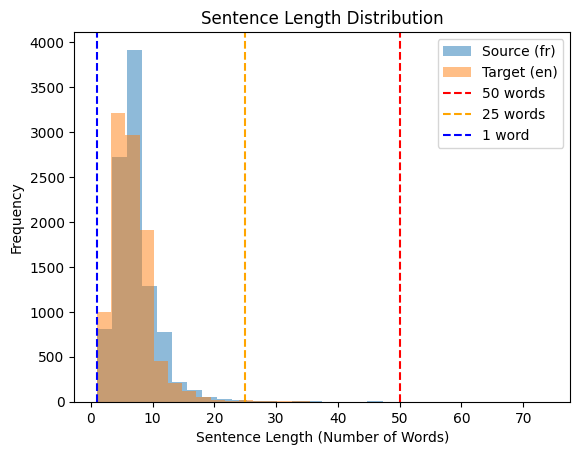

In [8]:
import matplotlib.pyplot as plt

plt.hist(src_lengths, bins=30, alpha=0.5, label='Source (fr)')
plt.hist(tgt_lengths, bins=30, alpha=0.5, label='Target (en)')
plt.axvline(x=50, color='red', linestyle='--', label='50 words')
plt.axvline(x=25, color='orange', linestyle='--', label='25 words')
plt.axvline(x=1, color='blue', linestyle='--', label='1 word')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Sentence Length Distribution')
plt.legend(loc='upper right')
plt.show()

**From the plot above, we can say in the training dataset, most sentences fall within a range of [1, 25] in length, with fewer or no extremely long sentences. It looks like a balanced dataset for training, so we can skip the step of filtering out sentences that are too long in the preprocess.**

## 2. Word Frequency Statistics

In [11]:
from collections import Counter

# word frequency
src_word_count = Counter(word for sentence in src_sentences for word in sentence.split())
tgt_word_count = Counter(word for sentence in tgt_sentences for word in sentence.split())

total_src_size = len(src_word_count)
total_tgt_size = len(tgt_word_count)

# low frequency word ratio
low_freq_src_words = [word for word, freq in src_word_count.items() if freq <= 2]
low_freq_tgt_words = [word for word, freq in tgt_word_count.items() if freq <= 2]

low_src_freq_ratio = (len(low_freq_src_words) / total_src_size) * 100
low_tgt_freq_ratio = (len(low_freq_tgt_words) / total_tgt_size) * 100

print(f"Source language low frequency word ratio: {low_src_freq_ratio}")
print(f"Target language low frequency word ratio: {low_tgt_freq_ratio}")

Source language low frequency word ratio: 77.67220902612827
Target language low frequency word ratio: 74.69496565159439


**In both training sets, there are low frequency words over 70%, I want to try some method like BPE（Byte-Pair Encoding）to improve the generalization ability of the model, especially for this low resource scenario.**

## 3. Duplicated / Repeated Sentence

In [24]:
duplicate_src_sentences = [sentence for sentence, count in Counter(src_sentences).items() if count > 1]
duplicate_tgt_sentences = [sentence for sentence, count in Counter(tgt_sentences).items() if count > 1]
print(f"Number of duplicate sentences in source: {len(duplicate_src_sentences)}")
print(f"Number of duplicate sentences in target: {len(duplicate_tgt_sentences)}")

Number of duplicate sentences in source: 33
Number of duplicate sentences in target: 158


In [25]:
def calculate_repetition_rate(sentences):
    sentence_counts = Counter(sentences)
    
    repeated_sentences = [sentence for sentence, count in sentence_counts.items() if count > 1]
    repeated_count = len(repeated_sentences)

    total_sentences = len(sentences)
    repetition_rate = (repeated_count / total_sentences)
    
    return repetition_rate, repeated_count, total_sentences

In [26]:
calculate_repetition_rate(src_sentences)

(0.0033, 33, 10000)

In [27]:
calculate_repetition_rate(tgt_sentences)

(0.0158, 158, 10000)

**In both datasets, repeated sentences ratio is less than 2%, for this result, I would say a small amount of repeated sentences will not bias the model to overfitting, and a small amount of repetition can also stabilize the output of the model. Therefore, repeated sentences won't be processed further.**